<a href="https://colab.research.google.com/github/JNK234/100-days-of-deep-learning/blob/main/Day%202/Day2_PETS_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai --upgrade --q

     |████████████████████████████████| 189 kB 5.3 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 


In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)

In [4]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [5]:
(path/'images').ls()

name = (path/'images').ls()[0]
name

Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_175.jpg')

In [6]:
re.findall(r'(.+)_\d+.jpg$', name.name)

['Birman']

In [7]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

In [8]:
dls = pets.dataloaders(path/'images')

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


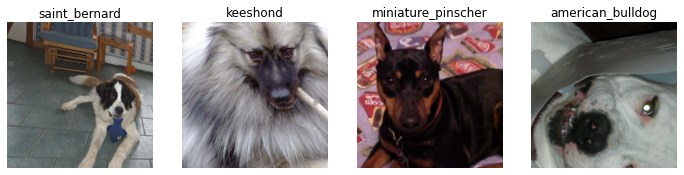

In [9]:
dls.show_batch(nrows=1, ncols=4)

In [10]:
pets.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/shiba_inu_100.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/shiba_inu_100.jpg
    applying partial gives
      shiba_inu
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(33)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(33))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item:

In [11]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.524617,0.372540,0.126522,01:33


epoch,train_loss,valid_loss,error_rate,time
0,0.535787,0.252028,0.081191,01:40
1,0.318747,0.206617,0.069689,01:39


In [12]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(minimum=0.010000000149011612, steep=0.0030199517495930195)

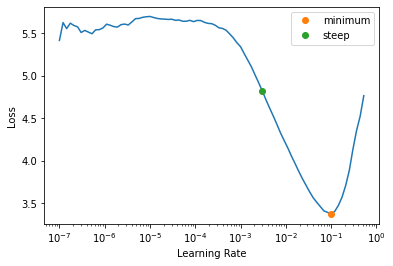

In [14]:
learn.lr_find(suggest_funcs=(SuggestionMethod.Minimum, SuggestionMethod.Steep))

In [16]:
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.140200,0.310134,0.100135,01:29
1,0.539454,0.230687,0.080514,01:29
2,0.330291,0.200256,0.071042,01:28


SuggestedLRs(minimum=6.309573450380412e-08, steep=2.0892961401841603e-05)

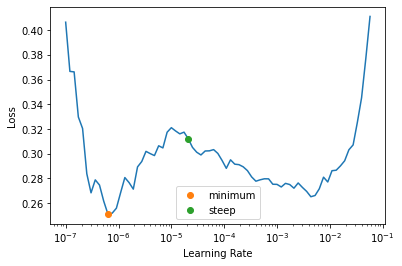

In [18]:
learn.lr_find(suggest_funcs=(minimum, steep))

In [19]:
learn.unfreeze()

In [20]:
learn.fit_one_cycle(4, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.272940,0.185770,0.066306,01:40
1,0.248916,0.181391,0.061570,01:39
2,0.225650,0.168574,0.061570,01:39
3,0.199567,0.164569,0.056834,01:39


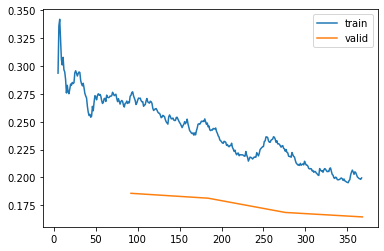

In [28]:
learn.recorder.plot_loss()

In [29]:
from fastai.callback.fp16 import *